In [4]:
import numpy as np

In [185]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size,ep=0):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        self.dummy = None
        self.ep = ep
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        ep = self.ep
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        if(ep==0) : print("Input shape = {} Output shape = {}".format(x.shape,a1.shape))
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        if(ep==0) : print("Input shape = {} Output shape = {}".format(a1.shape,a2.shape))
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        if(ep==0) : print("Input shape = {} Output shape = {}".format(a2.shape,y_.shape))
        
        self.ep += 1
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,lr=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
#         ep = self.ep
#         beta1 = 0.9
#         beta2 = 0.999
#         epsi = 10**(-8)
        
#         if(ep==0):
#             vo1 = np.zeros(W1.shape)
#             mo1 = np.zeros(W1.shape)
#             vob1 = np.zeros(b1.shape)
#             mob1 = np.zeros(b1.shape)
#             vo2 = np.zeros(W2.shape)
#             mo2 = np.zeros(W2.shape)
#             vob2 = np.zeros(b2.shape)
#             mob2 = np.zeros(b2.shape)
#             vo3 = np.zeros(W3.shape)
#             mo3 = np.zeros(W3.shape)
#             vob3 = np.zeros(b3.shape)
#             mob3 = np.zeros(b3.shape)
#         else : (vo1,mo1,vob1,mob1,vo2,mo2,vob2,mob2,vo3,mo3,vob3,mob3) = self.dummy
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        
#         ep += 1
#         mo1 = (mo1*beta1) + (1-beta1)*dw1 
#         vo1 = (vo1*beta2) + (1-beta2)*(dw1**2)
#         mo1_ = mo1/(1 - (beta1**ep))
#         vo1_ = vo1/(1 - (beta2**ep))
#         mob1 = (mob1*beta1) + (1-beta1)*db1 
#         vob1 = (vob1*beta2) + (1-beta2)*(db1**2)
#         mob1_ = mob1/(1 - (beta1**ep))
#         vob1_ = vob1/(1 - (beta2**ep))
        
#         mo2 = (mo2*beta1) + (1-beta1)*dw2 
#         vo2 = (vo2*beta2) + (1-beta2)*(dw2**2)
#         mo2_ = mo2/(1 - (beta1**ep))
#         vo2_ = vo2/(1 - (beta2**ep))
#         mob2 = (mob2*beta1) + (1-beta1)*db2 
#         vob2 = (vob2*beta2) + (1-beta2)*(db2**2)
#         mob2_ = mob2/(1 - (beta1**ep))
#         vob2_ = vob2/(1 - (beta2**ep))
        
#         mo3 = (mo3*beta1) + (1-beta1)*dw3 
#         vo3 = (vo3*beta2) + (1-beta2)*(dw3**2)
#         mo3_ = mo3/(1 - (beta1**ep))
#         vo3_ = vo3/(1 - (beta2**ep))
#         mob3 = (mob3*beta1) + (1-beta1)*db3 
#         vob3 = (vob3*beta2) + (1-beta2)*(db3**2)
#         mob3_ = mob3/(1 - (beta1**ep))
#         vob3_ = vob3/(1 - (beta2**ep))
        
#         self.model["W1"]  -= (lr*mo1_) / (np.sqrt(vo1_) + epsi)
#         self.model['b1']  -= (lr*mob1_) / (np.sqrt(vob1_) + epsi)
        
#         self.model["W2"]  -= (lr*mo2_) / (np.sqrt(vo2_) + epsi)
#         self.model['b2']  -= (lr*mob2_) / (np.sqrt(vob2_) + epsi)
        
#         self.model["W3"]  -= (lr*mo3_) / (np.sqrt(vo3_) + epsi)
#         self.model['b3']  -= (lr*mob3_) / (np.sqrt(vob3_) + epsi)
        
#         self.dummy = (vo1,mo1,vob1,mob1,vo2,mo2,vob2,mob2,vo3,mo3,vob3,mob3)
#         self.ep = ep
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= lr*dw1
        self.model['b1']  -= lr*db1
        
        self.model["W2"]  -= lr*dw2
        self.model['b2']  -= lr*db2
        
        self.model["W3"]  -= lr*dw3
        self.model['b3']  -= lr*db3
        
        return np.dot(delta1,W1.T)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)


In [186]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [187]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans
    

In [188]:
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt
# import numpy as np
# from visualize import plot_decision_boundary

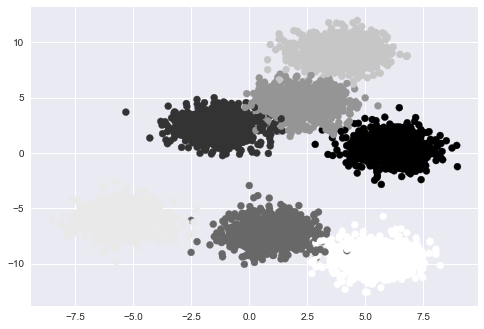

In [189]:
# X,Y = make_blobs(n_samples=5000,n_features=5,centers=7,random_state=10)
# plt.scatter(X[:,0],X[:,1], c=Y)

In [190]:
# def train(X,Y,model,epochs,learning_rate,logs=True):
#     training_loss = []
    
#     classes = 7
#     Y_OHT = one_hot(Y,classes)
#     print(Y_OHT[0])
    
#     for ix in range(epochs):
        
#         Y_ = model.forward(X)
#         l = loss(Y_OHT,Y_)
#         training_loss.append(l)
#         model.backward(X,Y_OHT,learning_rate)
        
#         if(logs):
#             print("Epoch %d Loss %.4f"%(ix,l))
            
    
#     return training_loss

In [191]:
# X.shape,Y.shape

((5000, 5), (5000,))

In [199]:
# model = NeuralNetwork(input_size=5,layers=[4,3],output_size=7)
# train(X,Y,model,1000,0.0001,logs=True)
# outputs = model.predict(X)

# training_accuracy = np.sum(outputs==Y)/Y.shape[0]
# print("Training Acc %.4f"%training_accuracy)

# plot_decision_boundary(lambda x:model.predict(x),X,Y)
# plt.show()


[0. 0. 0. 1. 0. 0. 0.]
Epoch 0 Loss 0.0534
Epoch 1 Loss 0.2435
Epoch 2 Loss 0.1155
Epoch 3 Loss 0.2357
Epoch 4 Loss 0.1208
Epoch 5 Loss 0.2307
Epoch 6 Loss 0.1250
Epoch 7 Loss 0.2267
Epoch 8 Loss 0.1286
Epoch 9 Loss 0.2231
Epoch 10 Loss 0.1318
Epoch 11 Loss 0.2200
Epoch 12 Loss 0.1348
Epoch 13 Loss 0.2170
Epoch 14 Loss 0.1376
Epoch 15 Loss 0.2142
Epoch 16 Loss 0.1402
Epoch 17 Loss 0.2116
Epoch 18 Loss 0.1427
Epoch 19 Loss 0.2090
Epoch 20 Loss 0.1451
Epoch 21 Loss 0.2066
Epoch 22 Loss 0.1474
Epoch 23 Loss 0.2043
Epoch 24 Loss 0.1497
Epoch 25 Loss 0.2020
Epoch 26 Loss 0.1518
Epoch 27 Loss 0.1998
Epoch 28 Loss 0.1539
Epoch 29 Loss 0.1977
Epoch 30 Loss 0.1559
Epoch 31 Loss 0.1957
Epoch 32 Loss 0.1578
Epoch 33 Loss 0.1937
Epoch 34 Loss 0.1597
Epoch 35 Loss 0.1919
Epoch 36 Loss 0.1614
Epoch 37 Loss 0.1901
Epoch 38 Loss 0.1631
Epoch 39 Loss 0.1884
Epoch 40 Loss 0.1647
Epoch 41 Loss 0.1869
Epoch 42 Loss 0.1662
Epoch 43 Loss 0.1854
Epoch 44 Loss 0.1676
Epoch 45 Loss 0.1840
Epoch 46 Loss 0.1689


Epoch 390 Loss 0.8851
Epoch 391 Loss 0.8117
Epoch 392 Loss 0.9455
Epoch 393 Loss 0.8421
Epoch 394 Loss 0.8494
Epoch 395 Loss 0.8967
Epoch 396 Loss 0.9055
Epoch 397 Loss 0.7760
Epoch 398 Loss 0.9630
Epoch 399 Loss 0.8494
Epoch 400 Loss 0.8284
Epoch 401 Loss 0.8984
Epoch 402 Loss 0.9270
Epoch 403 Loss 0.7441
Epoch 404 Loss 0.9736
Epoch 405 Loss 0.8604
Epoch 406 Loss 0.8072
Epoch 407 Loss 0.8987
Epoch 408 Loss 0.9441
Epoch 409 Loss 0.7192
Epoch 410 Loss 0.9727
Epoch 411 Loss 0.8770
Epoch 412 Loss 0.7804
Epoch 413 Loss 0.8962
Epoch 414 Loss 0.9601
Epoch 415 Loss 0.6992
Epoch 416 Loss 0.9462
Epoch 417 Loss 0.9177
Epoch 418 Loss 0.7404
Epoch 419 Loss 0.9098
Epoch 420 Loss 0.9648
Epoch 421 Loss 0.6928
Epoch 422 Loss 0.9441
Epoch 423 Loss 0.9369
Epoch 424 Loss 0.7230
Epoch 425 Loss 0.8982
Epoch 426 Loss 0.9362
Epoch 427 Loss 0.7056
Epoch 428 Loss 0.8976
Epoch 429 Loss 0.8971
Epoch 430 Loss 0.4674
Epoch 431 Loss 0.4614
Epoch 432 Loss 0.5659
Epoch 433 Loss 0.5016
Epoch 434 Loss 0.5630
Epoch 435 

Epoch 793 Loss 0.4690
Epoch 794 Loss 0.5857
Epoch 795 Loss 0.4690
Epoch 796 Loss 0.5857
Epoch 797 Loss 0.4690
Epoch 798 Loss 0.5857
Epoch 799 Loss 0.4690
Epoch 800 Loss 0.5857
Epoch 801 Loss 0.4690
Epoch 802 Loss 0.5857
Epoch 803 Loss 0.4690
Epoch 804 Loss 0.5857
Epoch 805 Loss 0.4690
Epoch 806 Loss 0.5857
Epoch 807 Loss 0.4690
Epoch 808 Loss 0.5857
Epoch 809 Loss 0.4690
Epoch 810 Loss 0.5857
Epoch 811 Loss 0.4690
Epoch 812 Loss 0.5857
Epoch 813 Loss 0.4690
Epoch 814 Loss 0.5857
Epoch 815 Loss 0.4690
Epoch 816 Loss 0.5857
Epoch 817 Loss 0.4690
Epoch 818 Loss 0.5857
Epoch 819 Loss 0.4690
Epoch 820 Loss 0.5857
Epoch 821 Loss 0.4690
Epoch 822 Loss 0.5857
Epoch 823 Loss 0.4690
Epoch 824 Loss 0.5857
Epoch 825 Loss 0.4690
Epoch 826 Loss 0.5857
Epoch 827 Loss 0.4690
Epoch 828 Loss 0.5857
Epoch 829 Loss 0.4690
Epoch 830 Loss 0.5857
Epoch 831 Loss 0.4690
Epoch 832 Loss 0.5857
Epoch 833 Loss 0.4690
Epoch 834 Loss 0.5857
Epoch 835 Loss 0.4690
Epoch 836 Loss 0.5857
Epoch 837 Loss 0.4690
Epoch 838 

ValueError: shapes (5178493,2) and (5,4) not aligned: 2 (dim 1) != 5 (dim 0)